In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start='2010-01-01'
end='2019-12-31'
df=data.DataReader('AAPL','yahoo',start,end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535087
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835587
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139961


In [6]:
df.reset_index()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535087
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [7]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

KeyError: "['Date'] not found in axis"

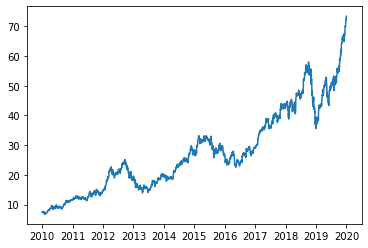

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535087
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835587
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130


In [10]:
ma100=df.Close.rolling(100).mean()
ma100

Date
2009-12-31          NaN
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
                ...    
2019-12-24    59.401700
2019-12-26    59.643125
2019-12-27    59.875125
2019-12-30    60.106325
2019-12-31    60.331875
Name: Close, Length: 2517, dtype: float64

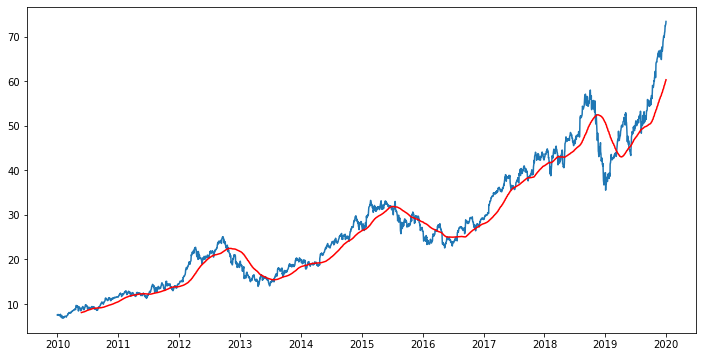

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [15]:
ma200= df.Close.rolling(200).mean()
ma200

Date
2009-12-31          NaN
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
                ...    
2019-12-24    54.261513
2019-12-26    54.396763
2019-12-27    54.529350
2019-12-30    54.661100
2019-12-31    54.793137
Name: Close, Length: 2517, dtype: float64

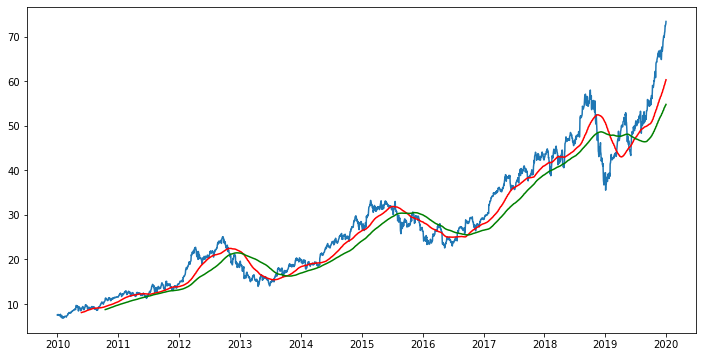

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [17]:
df.shape

(2517, 6)

In [18]:
#Splitting into training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

    

(1761, 1)
(756, 1)


In [19]:
data_training.head()

,Close
Date,
2009-12-31,7.526071
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714


In [20]:
data_testing.head()

,Close
Date,
2016-12-29,29.182501
2016-12-30,28.955000
2017-01-03,29.037500
2017-01-04,29.004999
2017-01-05,29.152500


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [25]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train,y_train =np.array(x_train),np.array(y_train)






In [26]:
#MACHINE LEARNING MODEL
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential




In [27]:
model= Sequential()
model.add(LSTM(units= 50,activation='relu',return_sequences =True,
              input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units= 60, activation='relu',return_sequences =True)),
model.add(Dropout(0.3))


model.add(LSTM(units= 80, activation='relu',return_sequences =True))
model.add(Dropout(0.4))



model.add(LSTM(units= 120,activation='relu'))
model.add(Dropout(0.5))
               
               
model.add(Dense(units=1))




In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)              

In [28]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 20s 384ms/step - loss: 0.0625
Epoch 2/50
52/52 [==============================] - 22s 420ms/step - loss: 0.0154
Epoch 3/50
52/52 [==============================] - 22s 424ms/step - loss: 0.0101
Epoch 4/50
52/52 [==============================] - 22s 421ms/step - loss: 0.0096
Epoch 5/50
52/52 [==============================] - 22s 422ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 22s 423ms/step - loss: 0.0079
Epoch 7/50
52/52 [==============================] - 22s 418ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 21s 407ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 22s 429ms/step - loss: 0.0080
Epoch 10/50
52/52 [==============================] - 22s 422ms/step - loss: 0.0071
Epoch 11/50
52/52 [==============================] - 22s 422ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 22s 428ms/step - loss: 0.0067
Epoch 13/50
5

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
Date,
2016-12-29,29.182501
2016-12-30,28.955000
2017-01-03,29.037500
2017-01-04,29.004999
2017-01-05,29.152500


In [35]:
past_100_days=data_training.tail(100)

In [41]:
final_df= past_100_days.append(data_testing,ignore_index=True)

In [42]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [43]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [44]:
input_data.shape

(856, 1)

In [45]:
x_test =[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [46]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [47]:
y_predicted=model.predict(x_test)


In [48]:
y_predicted.shape

(756, 1)

In [49]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [50]:
scaler.scale_

array([0.02099517])

In [51]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

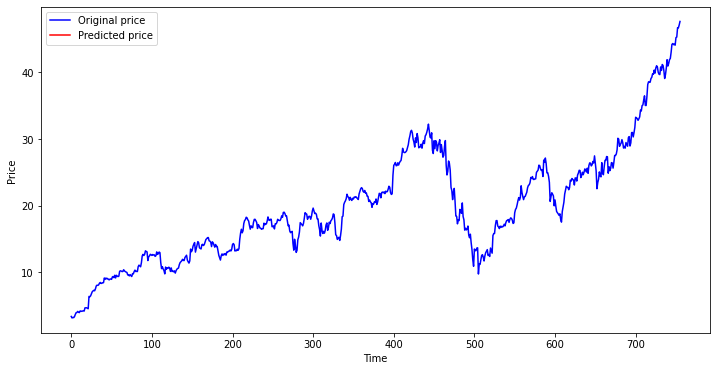

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original price')
plt.plot(y_predicted,'r',label ='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
